In [11]:
from collections import defaultdict
import scanpy as sc
import scanpy.external as sce
import pandas as pd

In [2]:
sc.settings.datasetdir

WindowsPath('data')

In [3]:

sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_versions()

In [4]:
# READ preprocessed counts

adata = sc.read_h5ad("./write/processed_adata.h5ad")
adata

AnnData object with n_obs × n_vars = 19789 × 1000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

**Compute clusters**

Louvain and Leiden are algorithms that find communities in a network. In our case, the network is the neighbour graph we computed in the previous notebook (to see the network you need to run the cells with tl.drow_graph and pl.draw_graph)

In [5]:
sc.tl.leiden(adata,resolution=0.25)
sc.tl.louvain(adata, resolution=0.25)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:19)


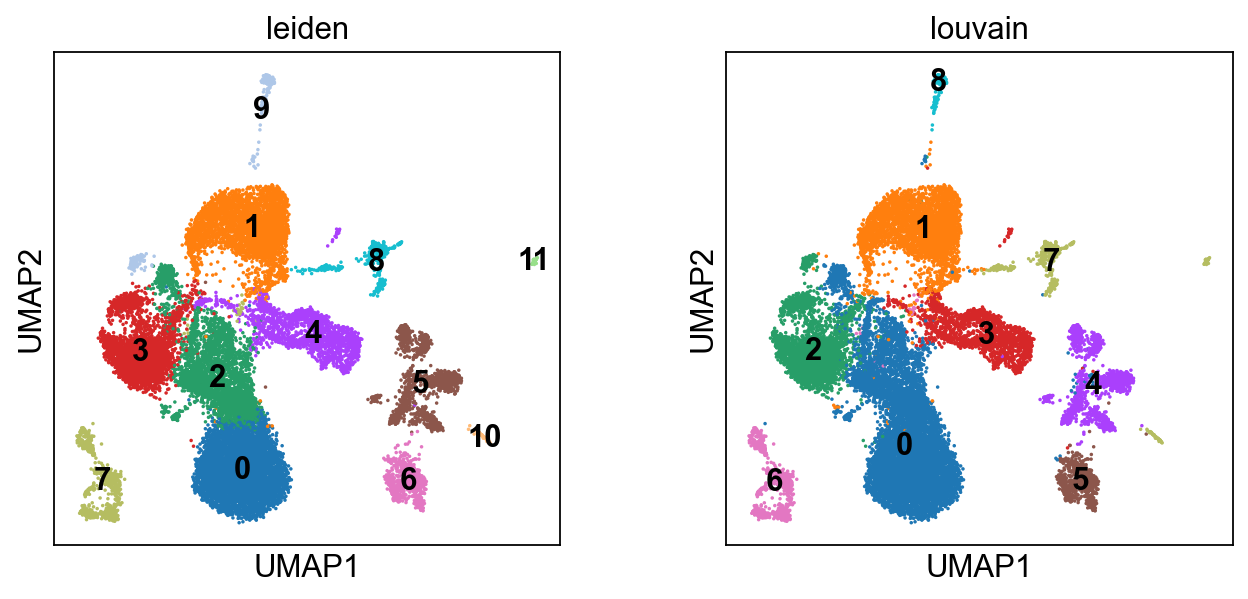

In [6]:
sc.pl.umap(adata, color=['leiden', 'louvain'], legend_loc="on data", size=10)

You can always plot UMAPs to higlight specific genes' expression in your data

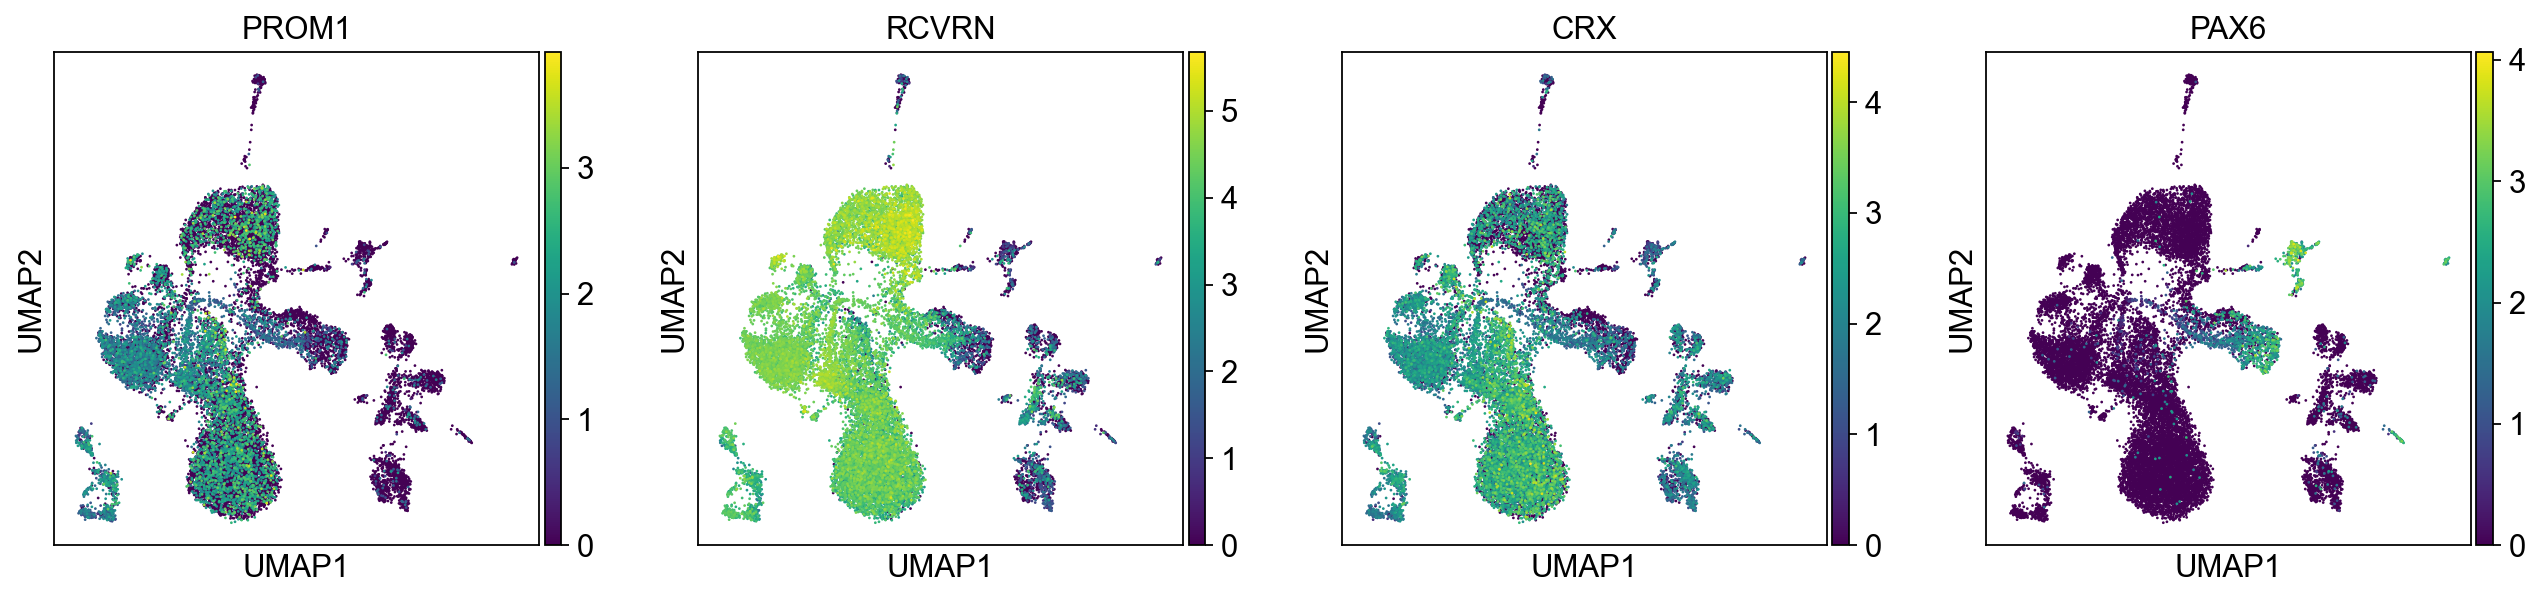

In [7]:
sc.pl.umap(adata, color=['PROM1', 'RCVRN', 'CRX', 'PAX6'])

**Finding marker genes**

In [ ]:
# T-TEST
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
# Logistic regression
sc.tl.rank_genes_groups(adata, 'louvain', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:02)


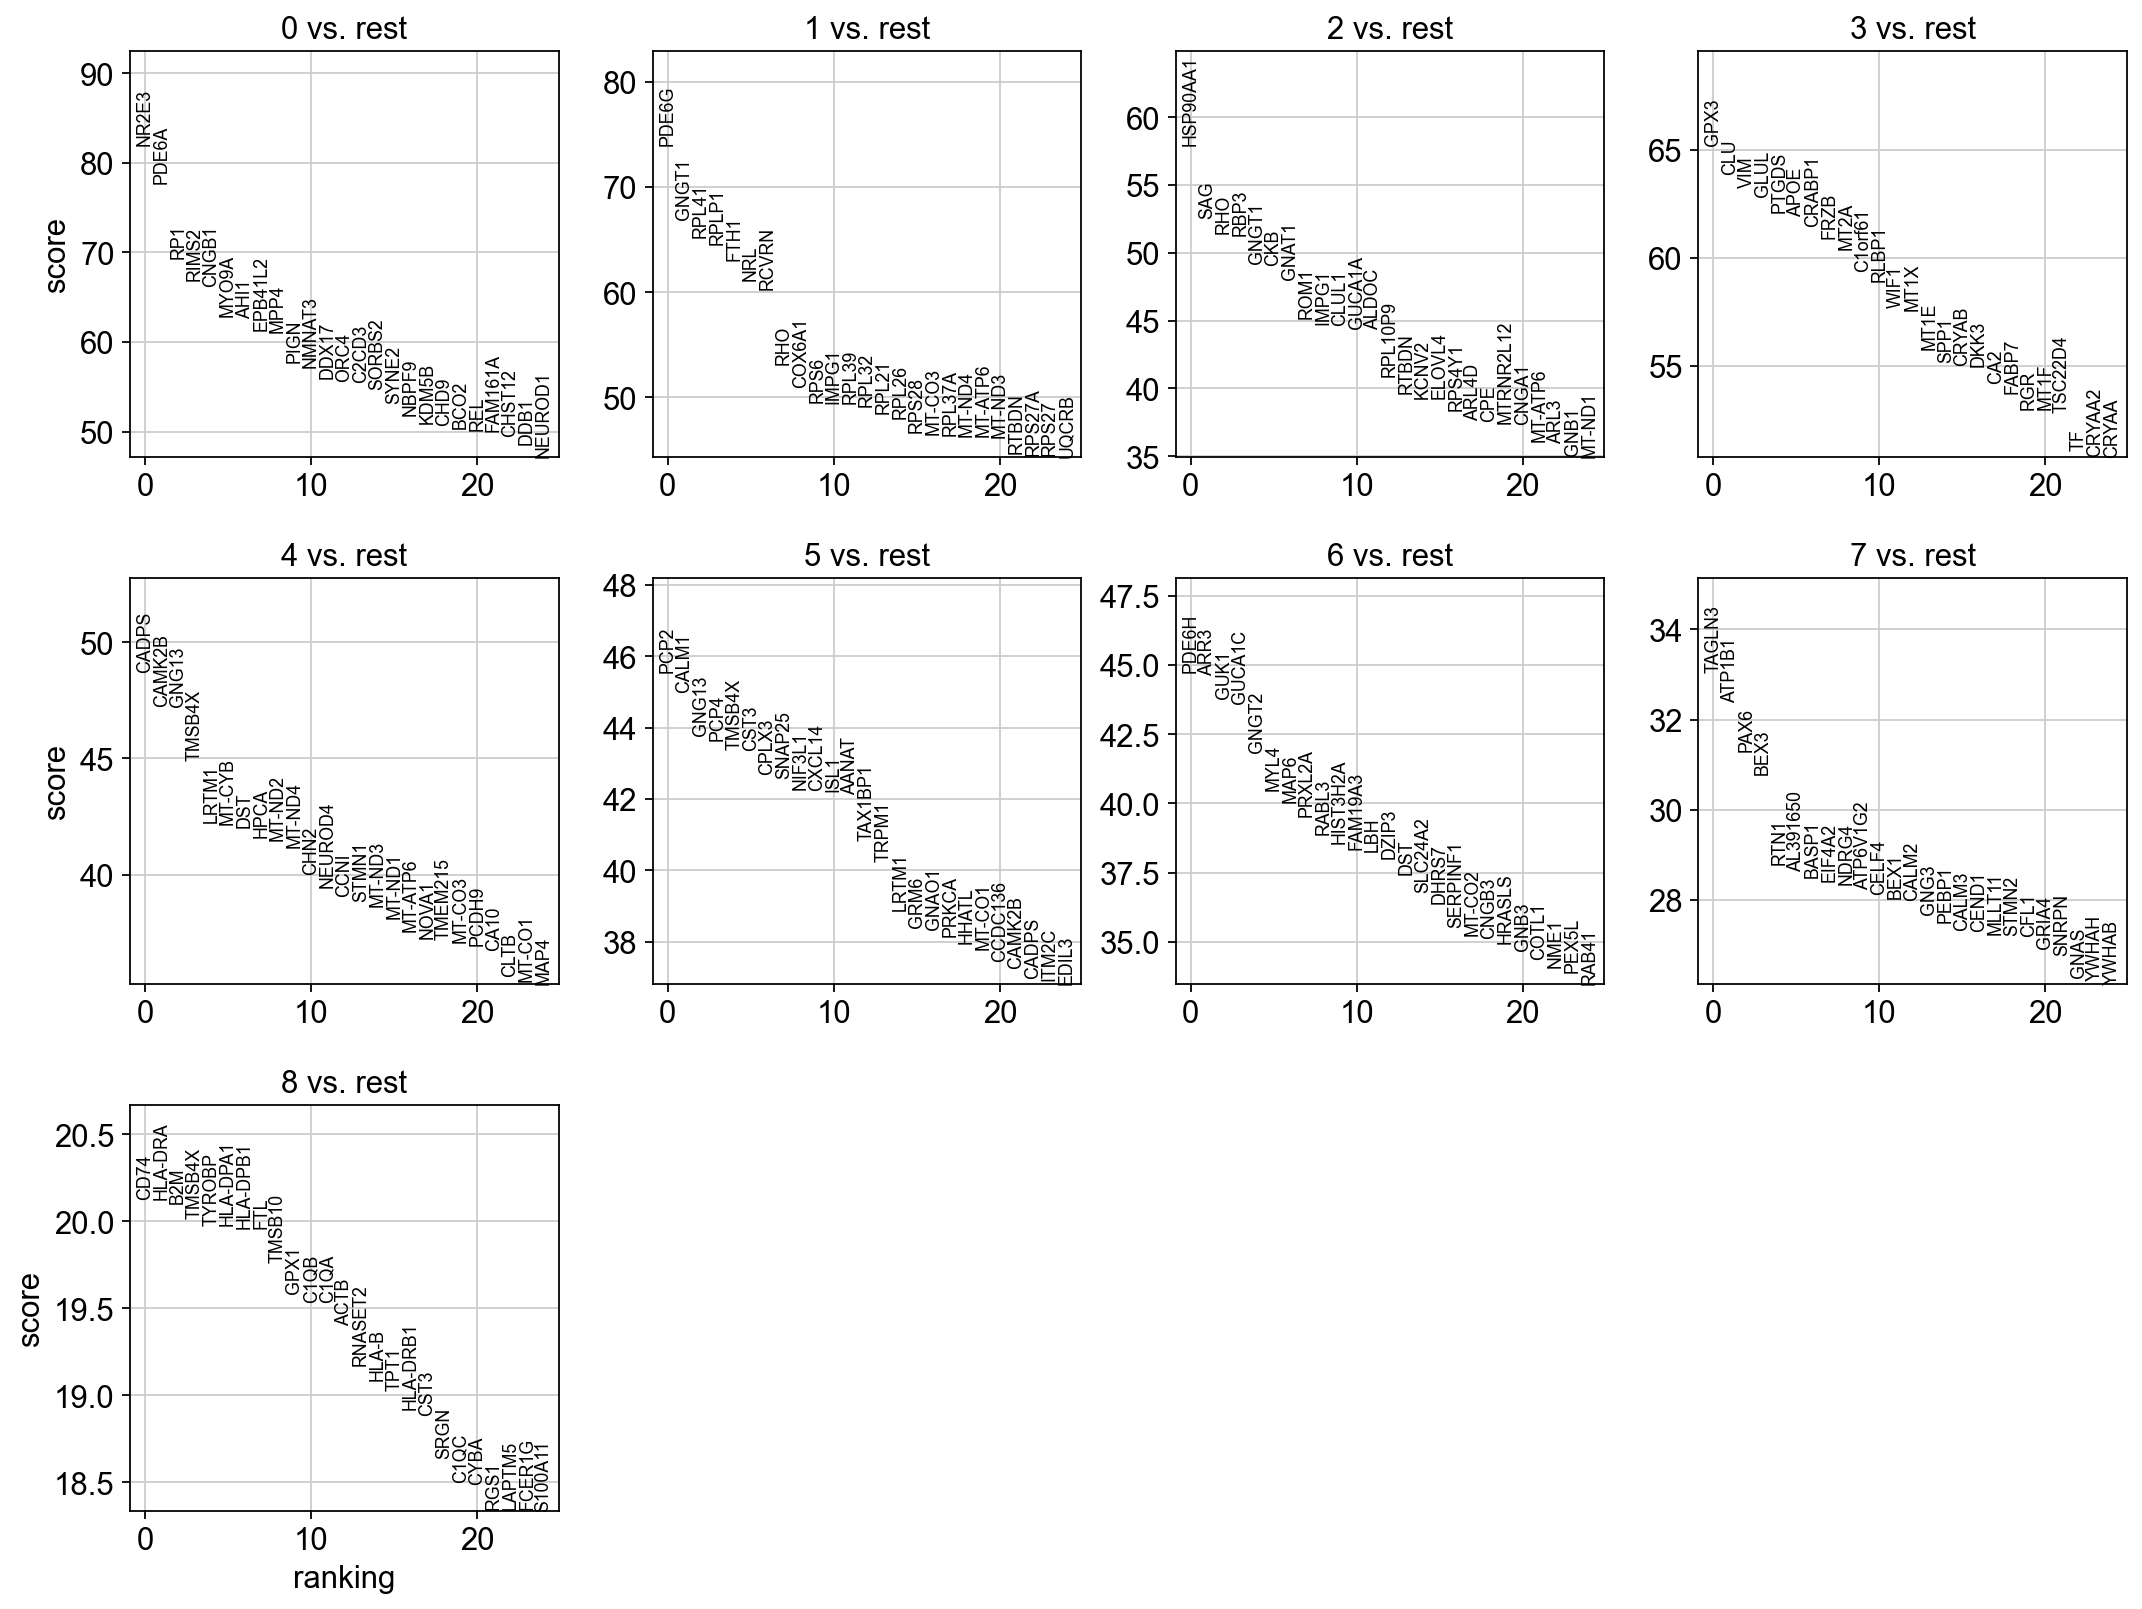

In [8]:
# Wilcoxon Rank-Sum
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [12]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

0        1          2        3        4        5         6  \
0     NR2E3    PDE6G   HSP90AA1     GPX3    CADPS     PCP2     PDE6H   
1     PDE6A    GNGT1        SAG      CLU   CAMK2B    CALM1      ARR3   
2       RP1    RPL41        RHO      VIM    GNG13    GNG13      GUK1   
3     RIMS2    RPLP1       RBP3     GLUL   TMSB4X     PCP4    GUCA1C   
4     CNGB1     FTH1      GNGT1    PTGDS    LRTM1   TMSB4X     GNGT2   
5     MYO9A      NRL        CKB     APOE   MT-CYB     CST3      MYL4   
6      AHI1    RCVRN      GNAT1   CRABP1      DST    CPLX3      MAP6   
7   EPB41L2      RHO       ROM1     FRZB     HPCA   SNAP25    PRXL2A   
8      MPP4   COX6A1      IMPG1     MT2A   MT-ND2   NIF3L1     RABL3   
9      PIGN     RPS6      CLUL1  C1orf61   MT-ND4   CXCL14  HIST3H2A   
10   NMNAT3    IMPG1     GUCA1A    RLBP1     CHN2     ISL1   FAM19A3   
11    DDX17    RPL39      ALDOC     WIF1  NEUROD4    AANAT       LBH   
12     ORC4    RPL32    RPL10P9     MT1X     CCNI  TAX1BP1     DZIP3   
13    C2CD3    RPL21      RTBDN     MT1E    STMN1    TRPM1       DST   
14   SORBS2    RPL26      KCNV2     SPP1   MT-ND3    LRTM1   SLC24A2   
15    SYNE2    RPS28     ELOVL4    CRYAB   MT-ND1     GRM6     DHRS7   
16    NBPF9   MT-CO3     RPS4Y1     DKK3  MT-ATP6    GNAO1  SERPINF1   
17    KDM5B   RPL37A      ARL4D      CA2    NOVA1    PRKCA    MT-CO2   
18     CHD9   MT-ND4        CPE    FABP7  TMEM215    HHATL     CNGB3   
19     BCO2  MT-ATP6  MTRNR2L12      RGR   MT-CO3   MT-CO1    HRASLS   

           7         8  
0     TAGLN3      CD74  
1     ATP1B1   HLA-DRA  
2       PAX6       B2M  
3       BEX3    TMSB4X  
4       RTN1    TYROBP  
5   AL391650  HLA-DPA1  
6      BASP1  HLA-DPB1  
7     EIF4A2       FTL  
8      NDRG4    TMSB10  
9   ATP6V1G2      GPX1  
10     CELF4      C1QB  
11      BEX1      C1QA  
12     CALM2      ACTB  
13      GNG3   RNASET2  
14     PEBP1     HLA-B  
15     CALM3      TPT1  
16     CEND1  HLA-DRB1  
17    MLLT11      CST3  
18     STMN2      SRGN  
19      CFL1      C1QC

You can also use these list of genes for GO/KEGG/REACTOME enrichment analysis, or upload them to STRING like Isabel yesterday

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


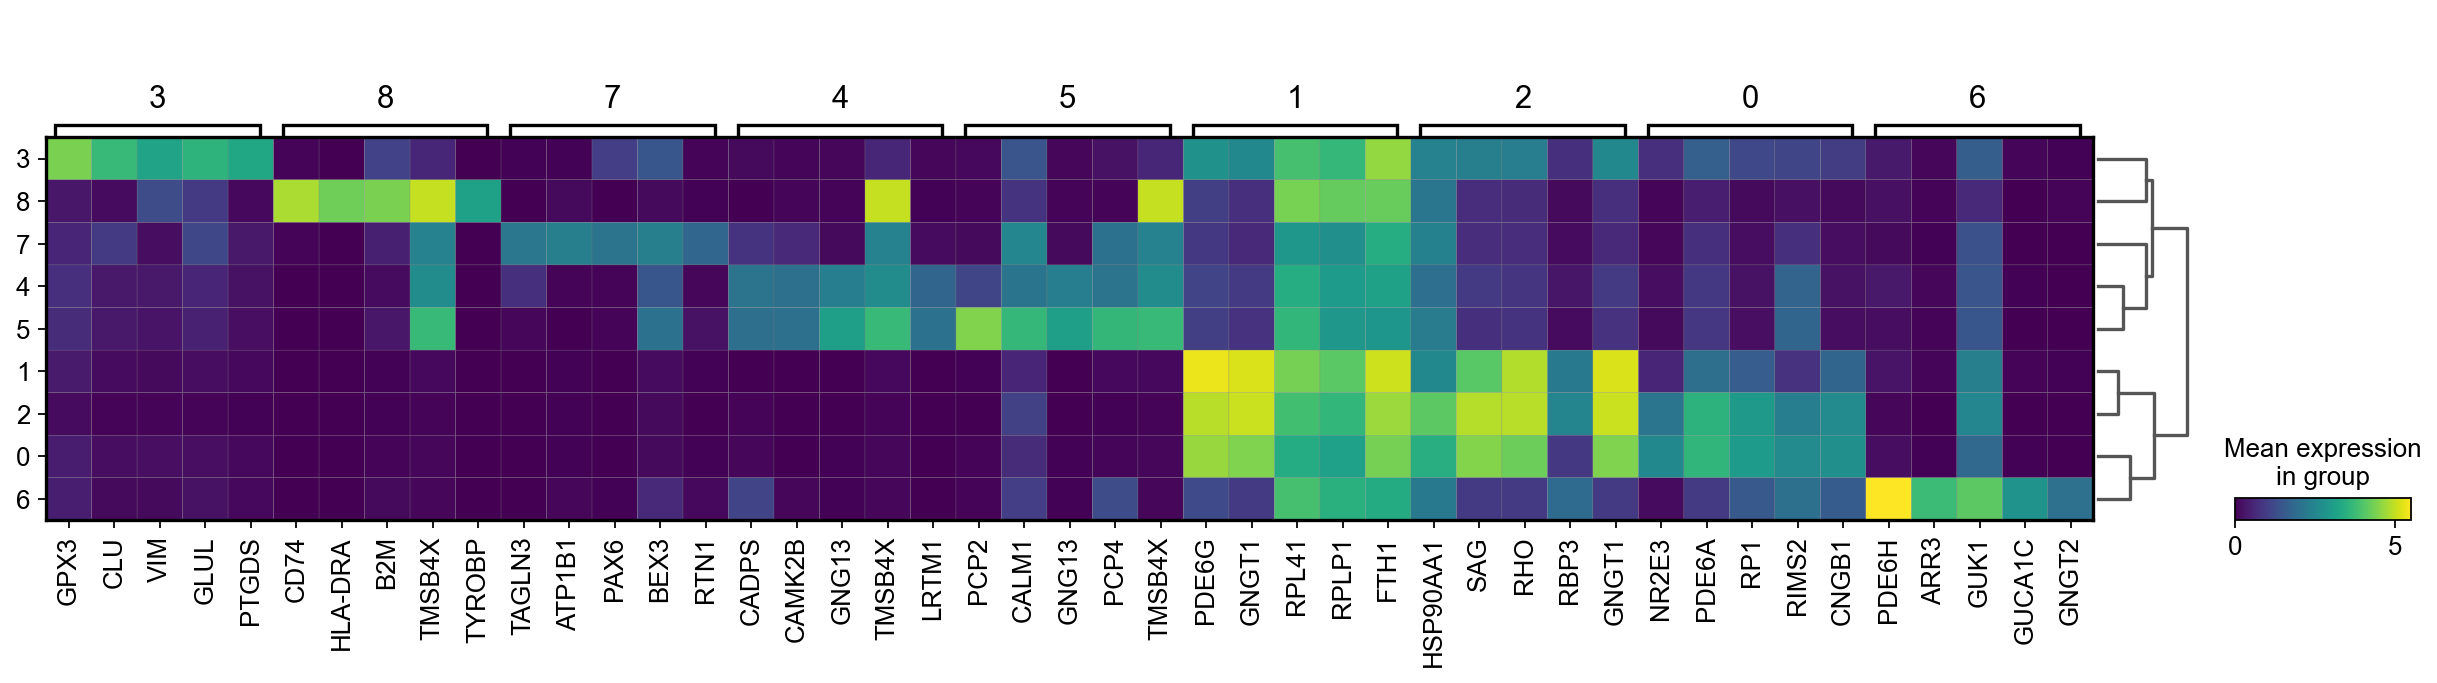

In [13]:
sc.pl.rank_genes_groups_matrixplot(adata,
                                n_genes=5,
                                use_raw=True,
#                                 show_gene_labels=True
                               )

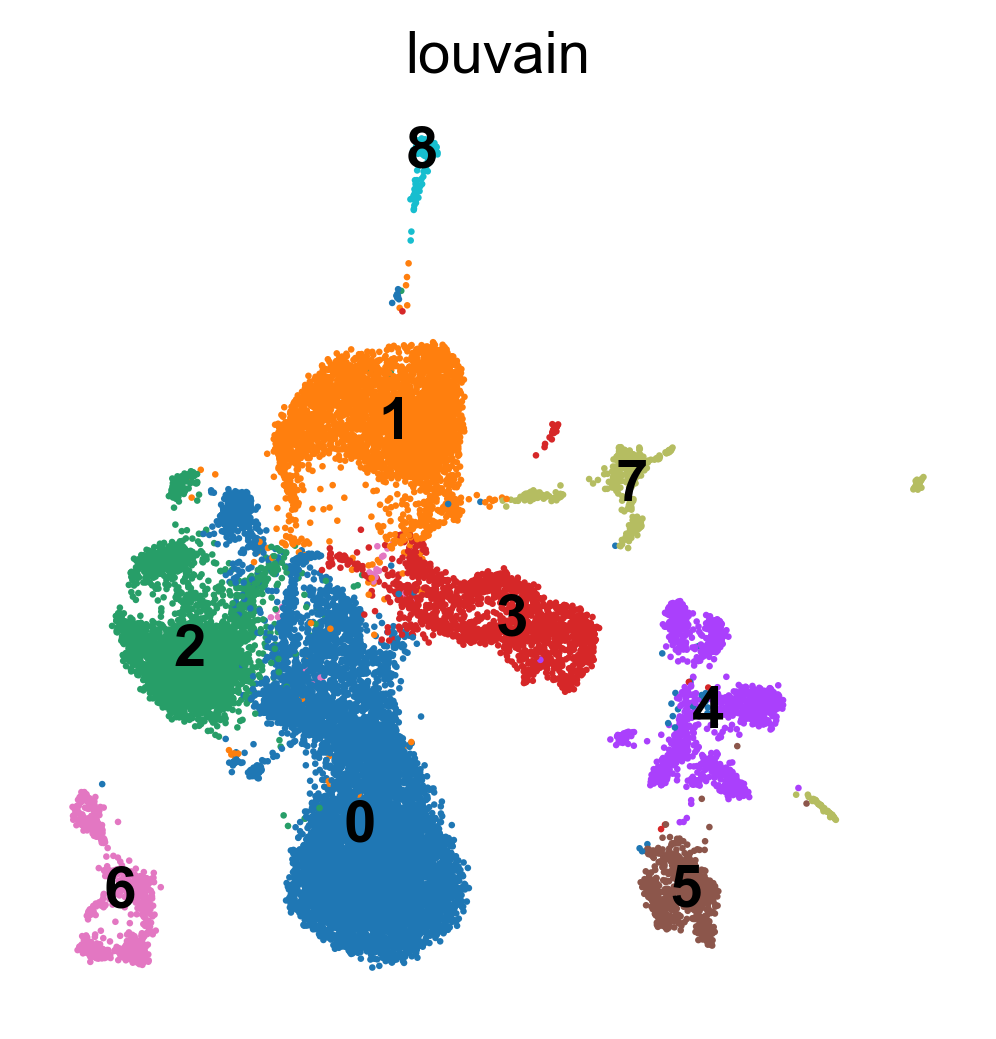

In [14]:
sc.settings.set_figure_params(dpi=150)

sc.pl.umap(adata, color=['louvain'], legend_loc="on data", size=10, frameon=False)
sc.settings.set_figure_params(dpi=80)

In [15]:
# scale and store results in layer
adata.layers['scaled'] = sc.pp.scale(adata, copy=True).X

Known celltypes markers

In [16]:
marker_genes_dict = {
    'Rods'               : ['RHO', 'PDE6A','NRL','GNAT1','CNGA1'],
    'Cones'              : ['ARR3', 'PDE6H','OPN1LW','GNGT2', 'GUCA1C'],
    'RGCs'               : ['THY1', 'NRN1','SNCG','NEFL', 'GAP43'],
    'Amacrine cells'     : ['CHAT', 'NRXN2','GAD1'],
    'Horizontal cells'   : ['ONECUT1','ONECUT2'],
    'Bipolar cells'      : ['TRPM1','VSX2','OTX2'],
    'Microglia'          : ['C1QA'],
    'MullerGlia cells'   : ['RLBP1'],
}

categories: 0, 1, 2, etc.
var_group_labels: Rods, Cones, RGCs, etc.


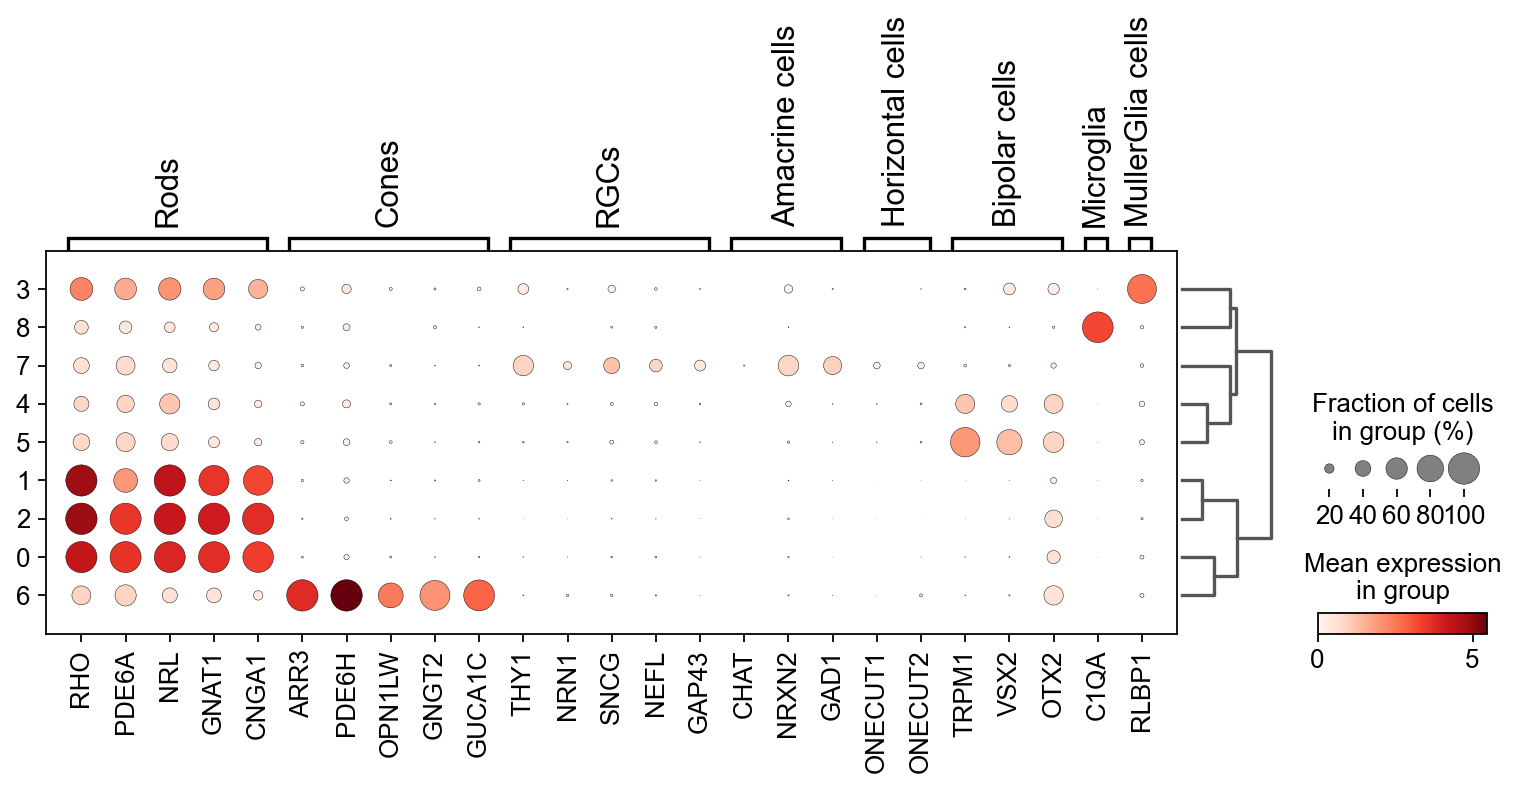

In [17]:
sc.pl.dotplot(adata, marker_genes_dict, 'louvain', dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: Rods, Cones, RGCs, etc.


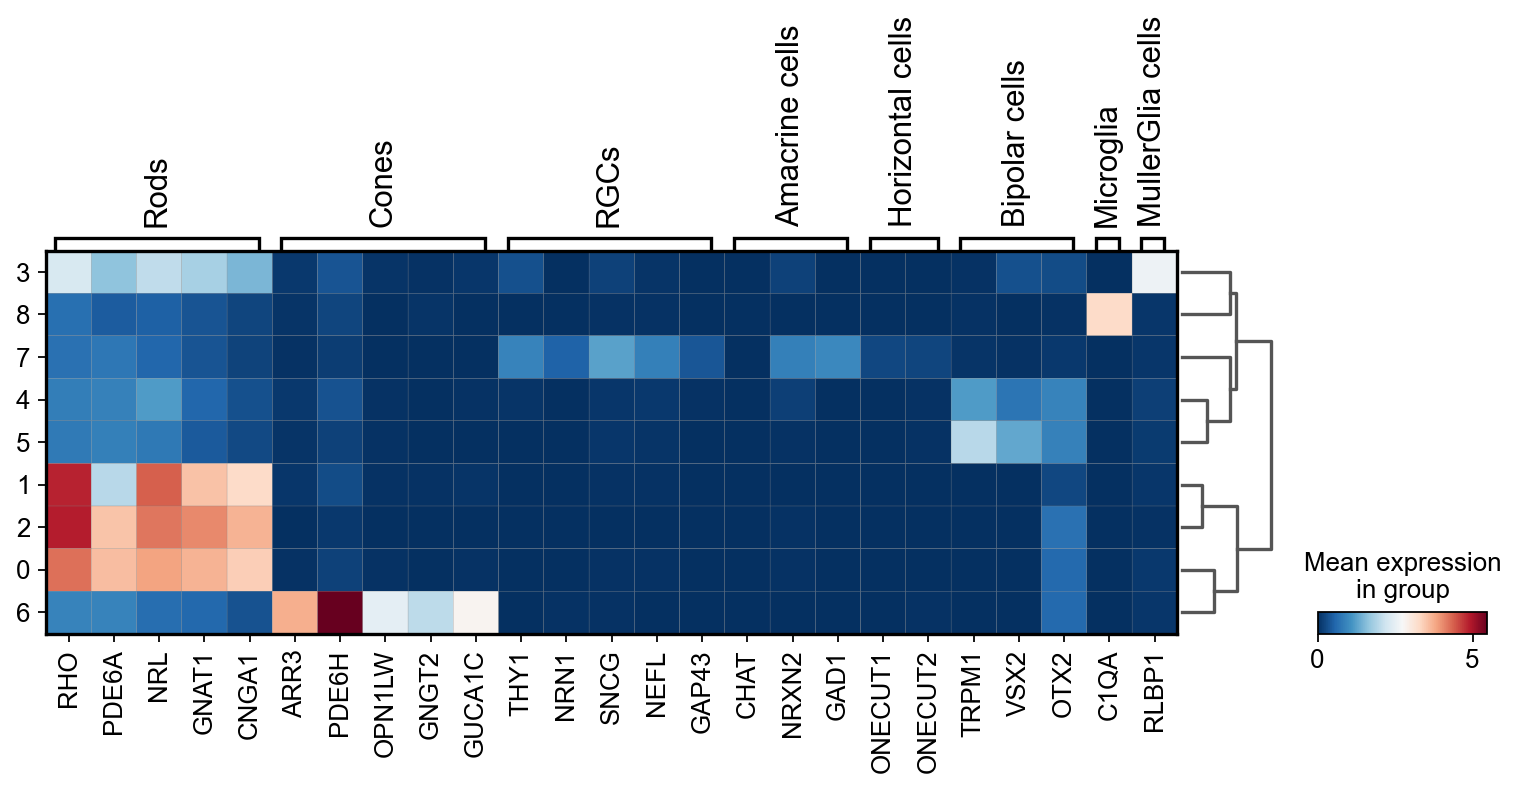

In [18]:
sc.pl.matrixplot(adata, marker_genes_dict, 'louvain', dendrogram=True,
                cmap='RdBu_r')

In [19]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Rods1',
     '1': 'Rods2',
     '2': 'Rods3',
     '3': 'MullerGlia',
     '4': 'Bipolar1',
     '5': 'Bipolar2',
     '6': 'Cones',
     '7': 'Amacrine/Horizontal',
     '8': 'Microglia',
     '9': 'RGCs'
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['cell type'] = adata.obs['louvain'].map(cluster2annotation).astype('category')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell type']`
categories: Rods1, Rods2, Rods3, etc.
var_group_labels: Rods, Cones, RGCs, etc.


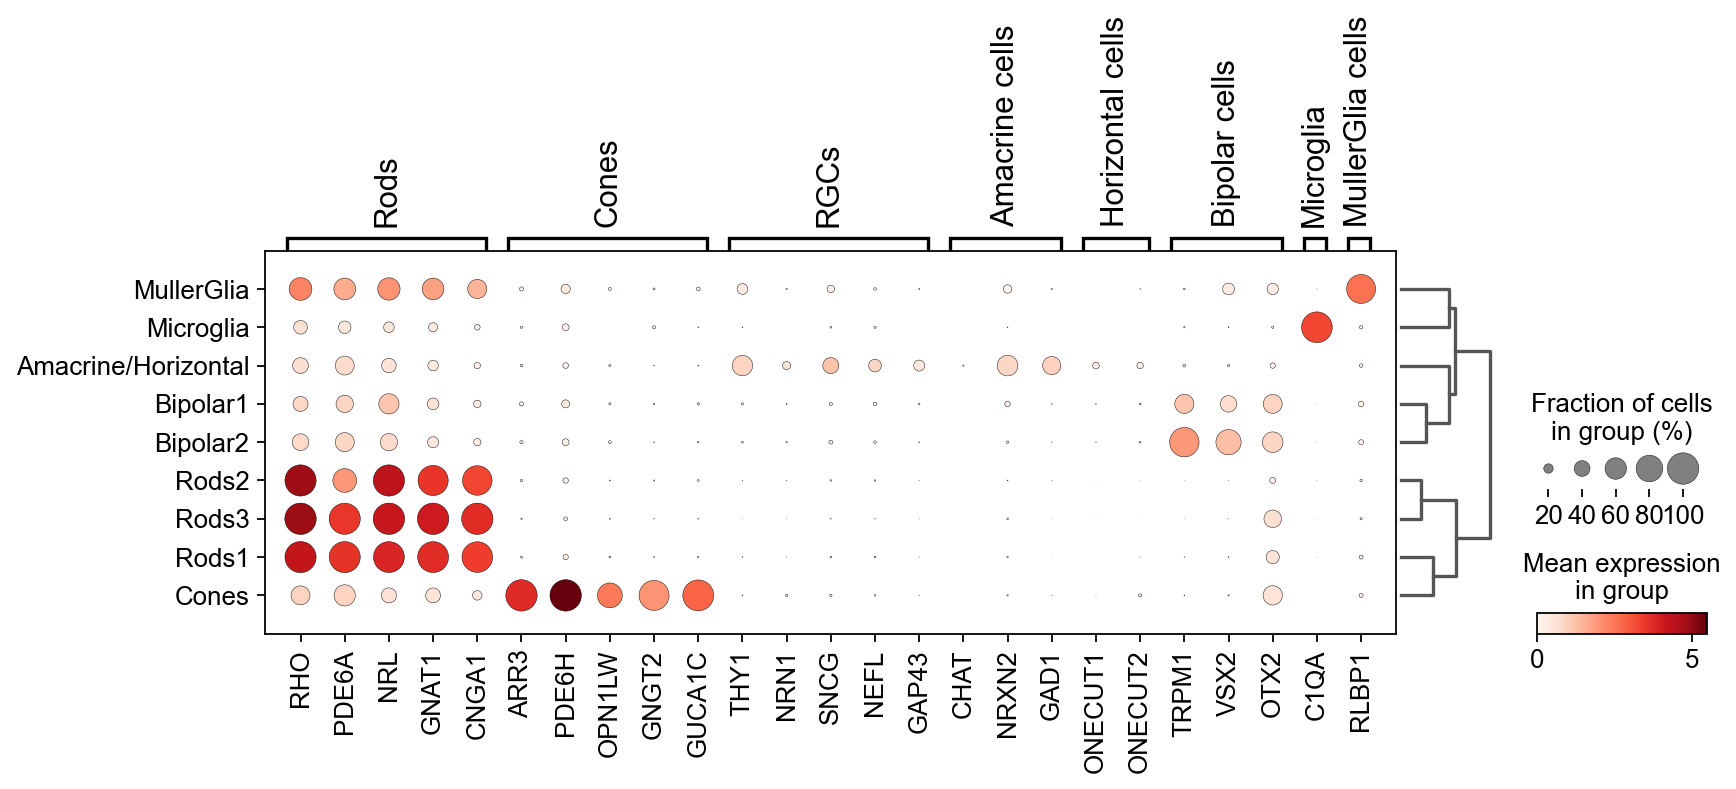

In [20]:
sc.pl.dotplot(adata, marker_genes_dict, 'cell type', dendrogram=True)


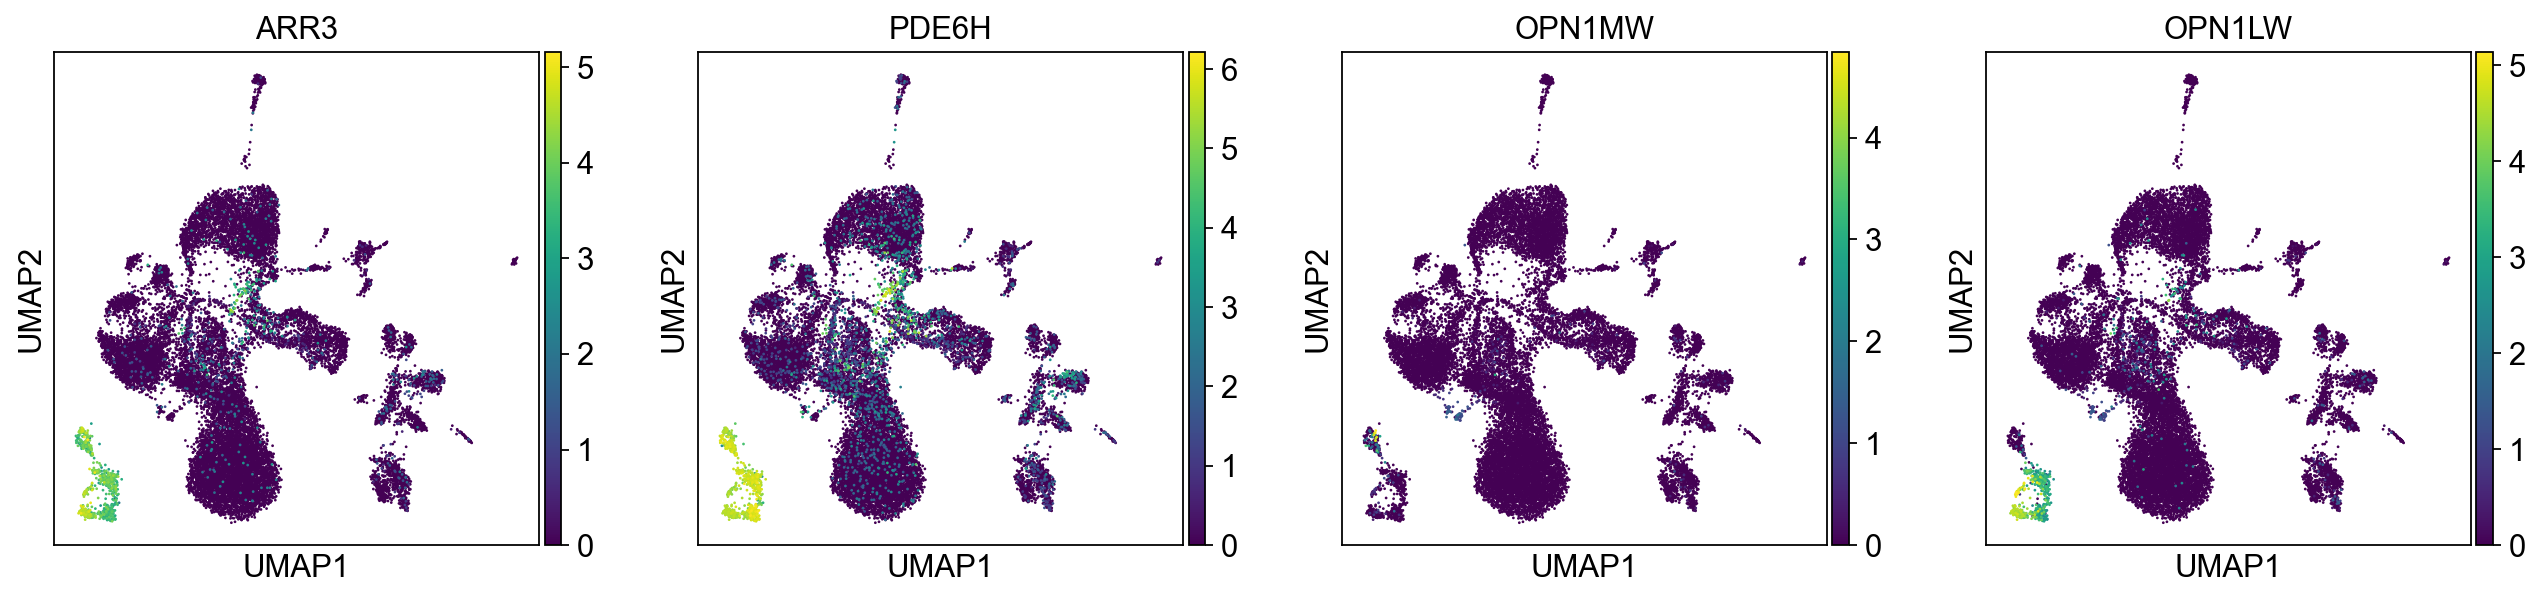

In [21]:
# CONES 7
sc.pl.umap(adata, color=['ARR3', 'PDE6H','OPN1MW','OPN1LW'])

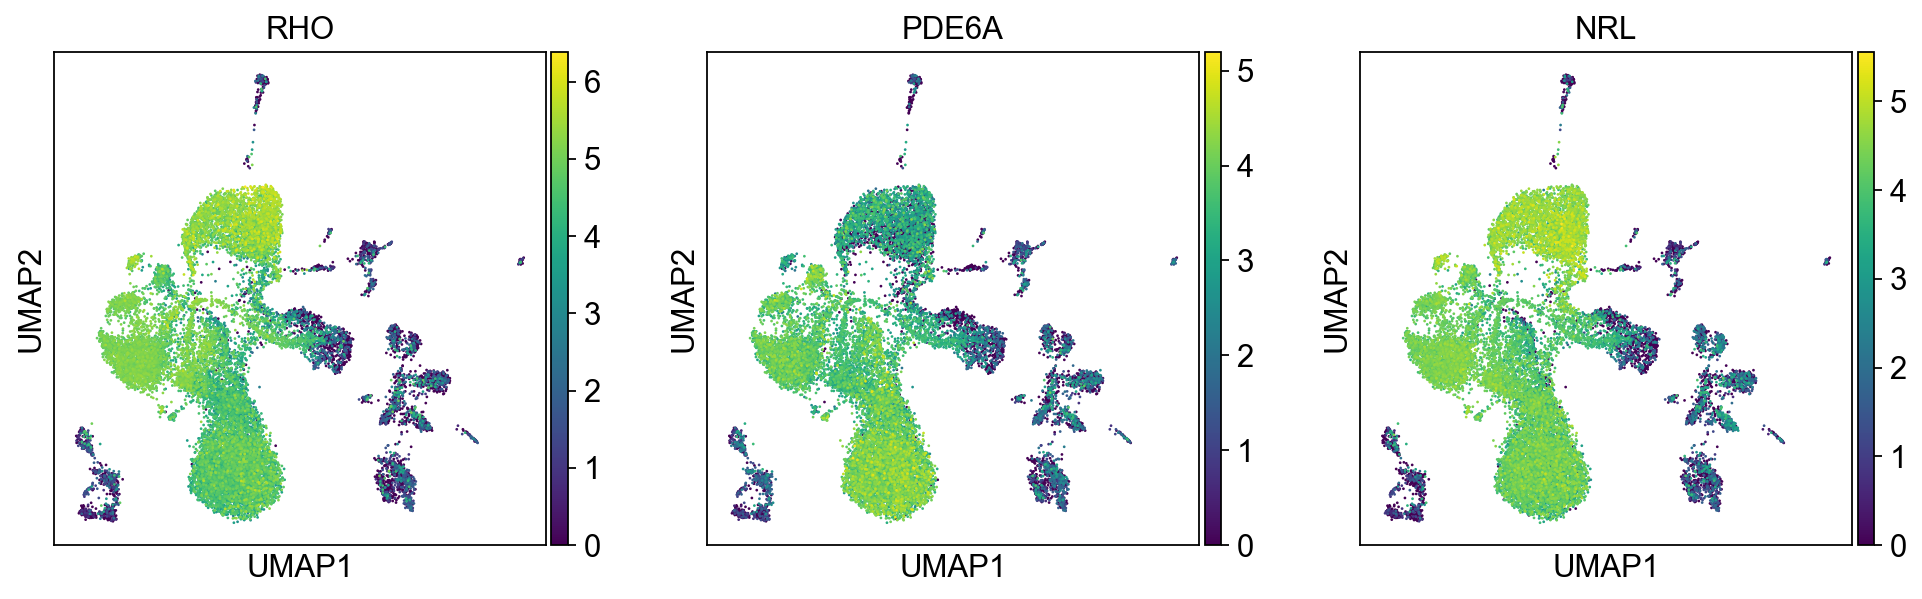

In [22]:
# ROD 1
sc.pl.umap(adata, color=['RHO', 'PDE6A','NRL'])

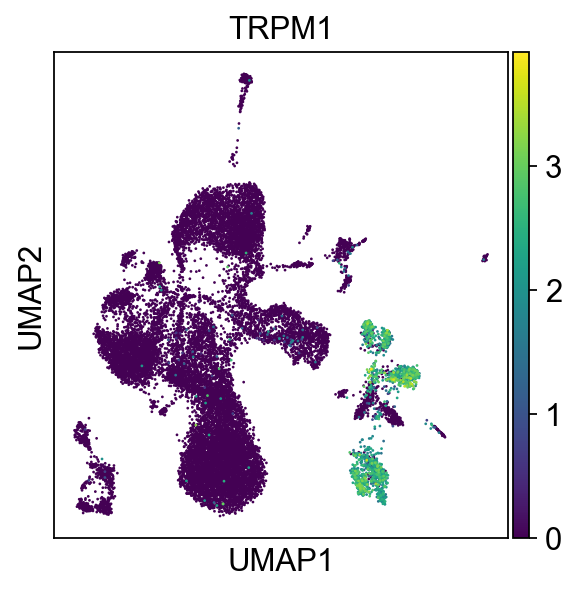

In [23]:
# Bipolar
sc.pl.umap(adata, color=['TRPM1'])

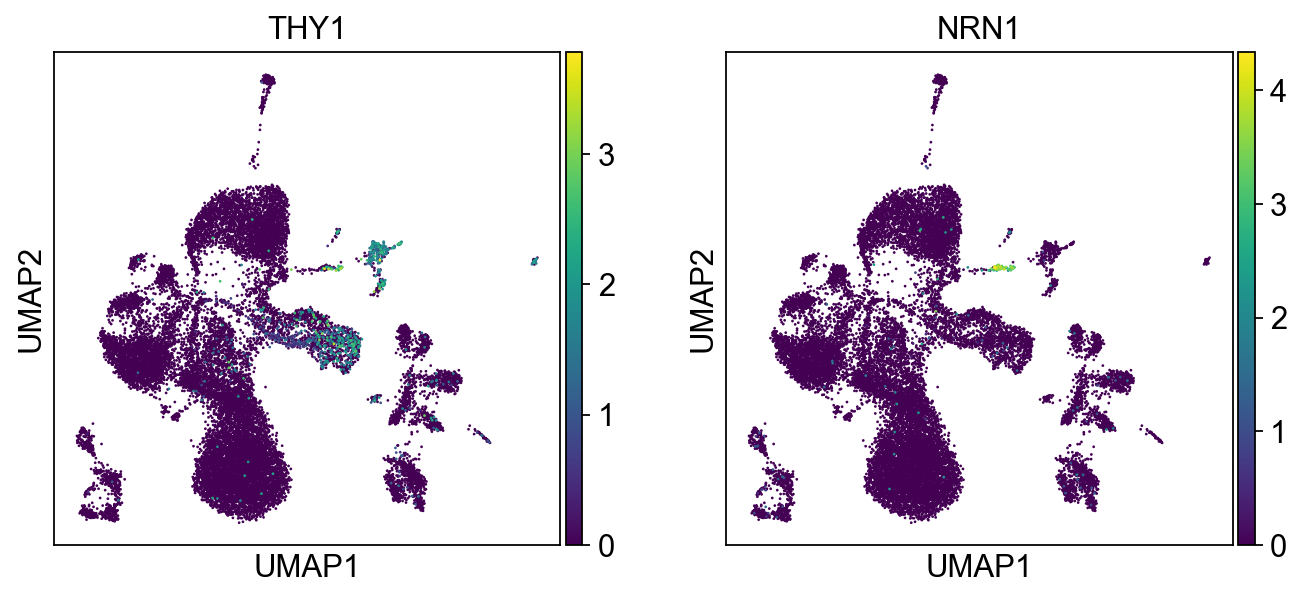

In [24]:
# Retinal ganlglion cells
sc.pl.umap(adata, color=['THY1',"NRN1"])

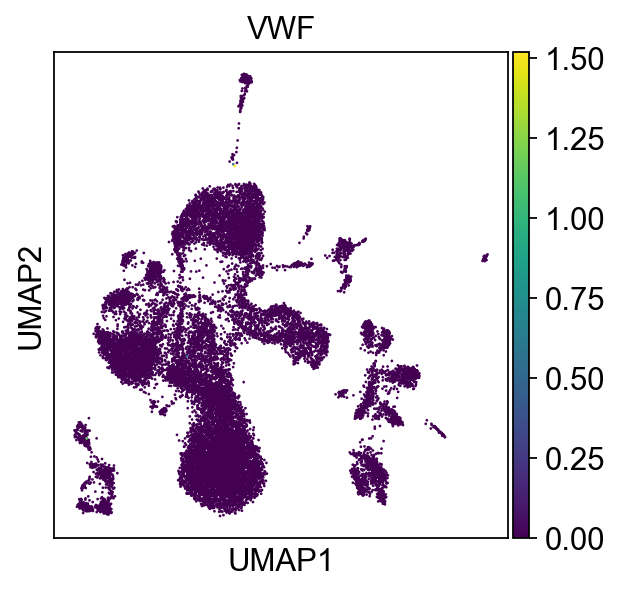

In [25]:
# endothelial
sc.pl.umap(adata, color=['VWF'])

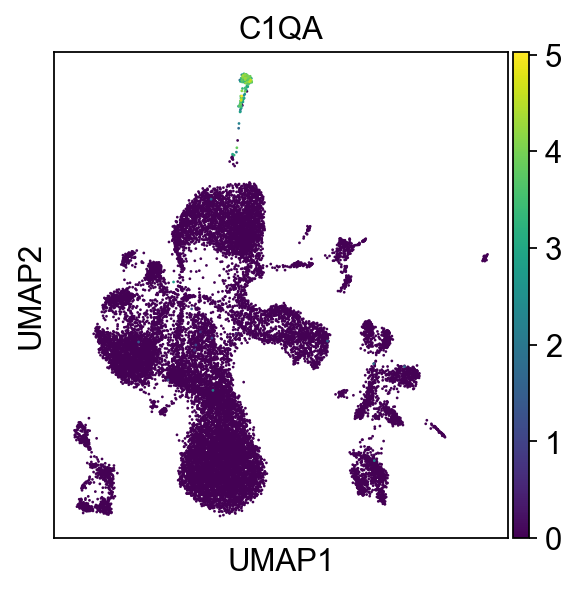

In [26]:
# microglia
sc.pl.umap(adata, color=['C1QA'])

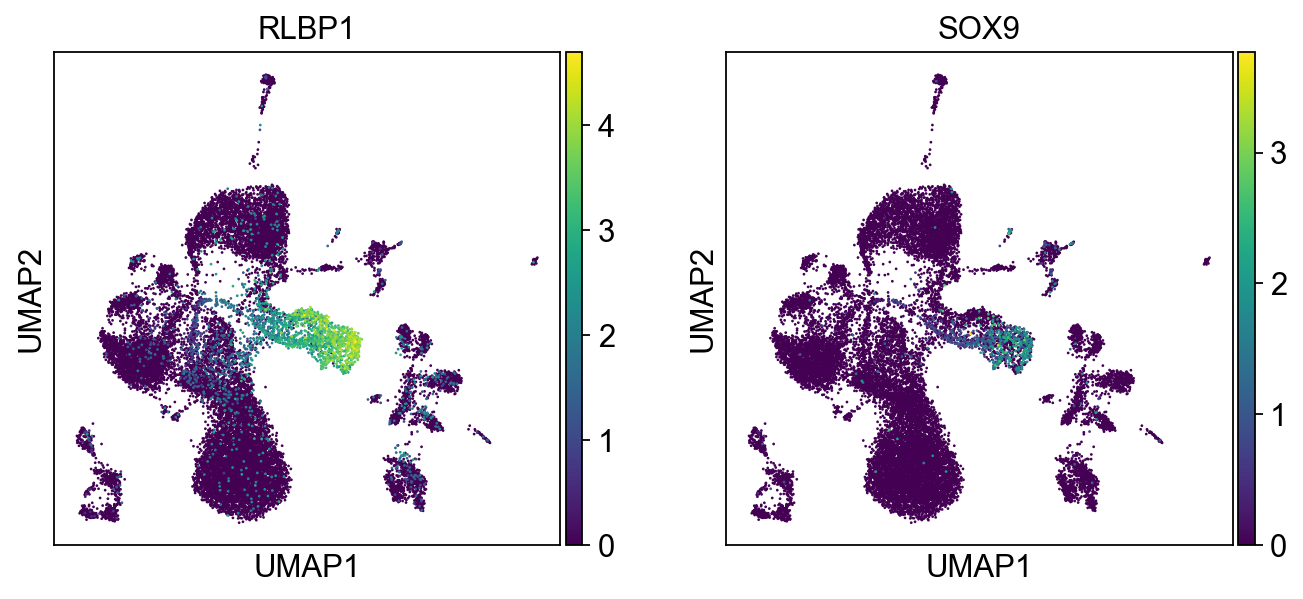

In [27]:
# Glial cells

sc.pl.umap(adata, color=['RLBP1','SOX9'])

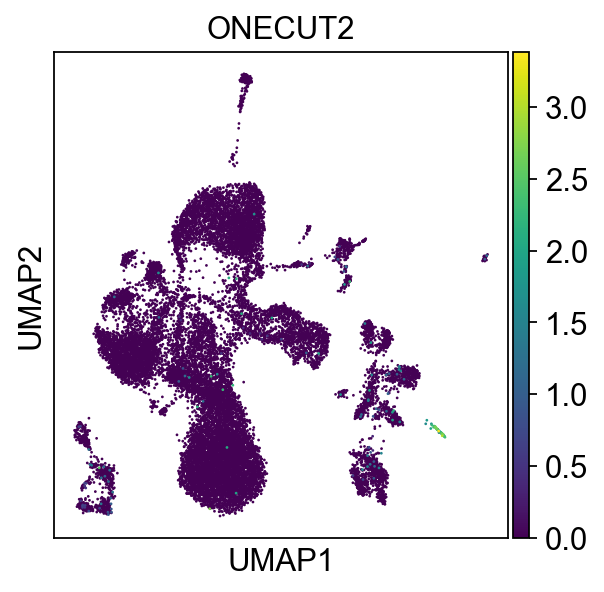

In [28]:
# Horizontal cells

sc.pl.umap(adata, color=['ONECUT2'])

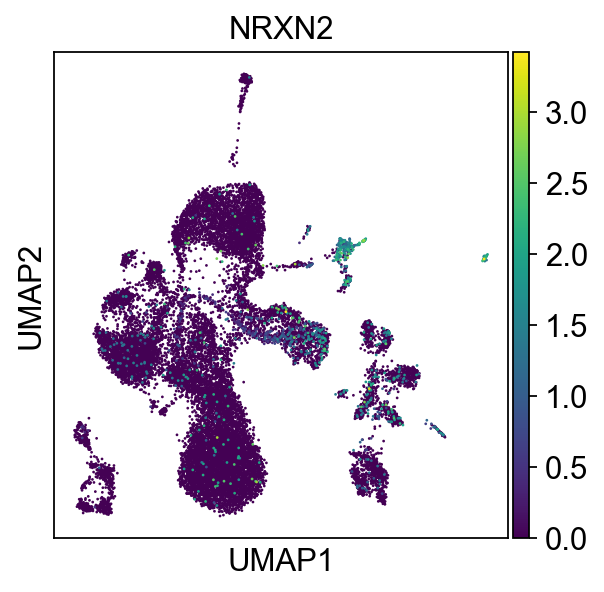

In [29]:
# Amacrine cells

sc.pl.umap(adata, color=['NRXN2'])

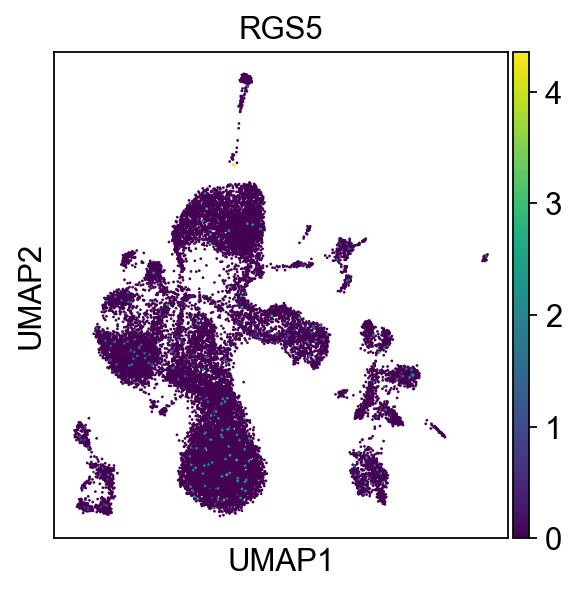

In [30]:
# Pericyte cells

sc.pl.umap(adata, color=['RGS5'])

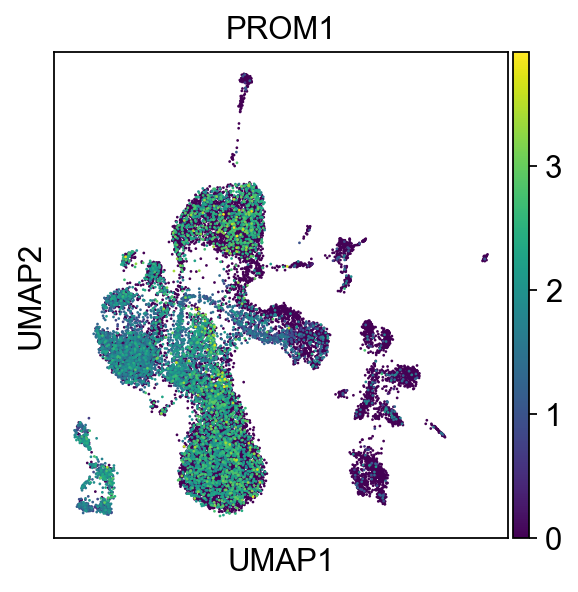

In [31]:
sc.pl.umap(adata, color=['PROM1'])

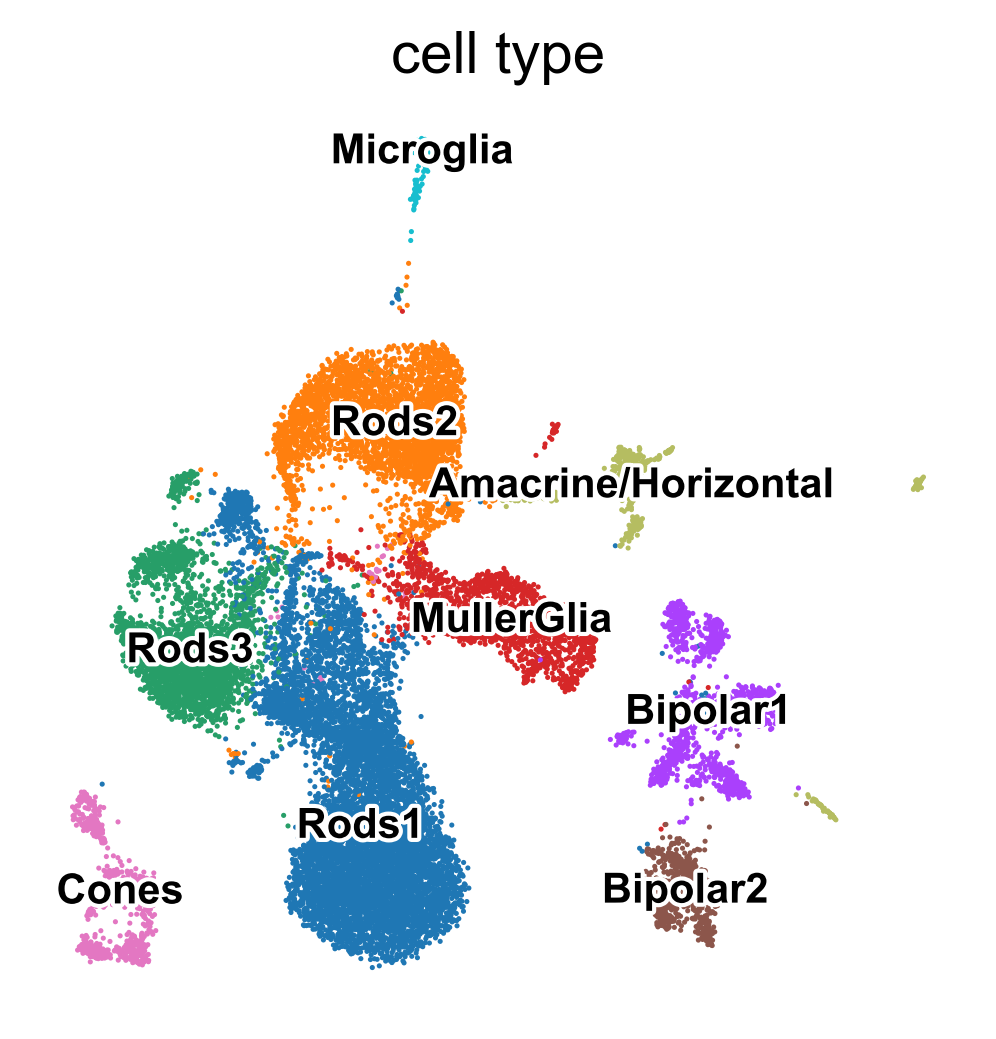

In [32]:
sc.settings.set_figure_params(dpi=150)

sc.pl.umap(adata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

sc.settings.set_figure_params(dpi=80)

Save the annotated dataset

In [33]:
adata.write_h5ad('./write/annotated_adata.h5ad')